# Notebook for erosmining


Importerer nbtext og også pandas for å gjøre statistikken.

In [1]:
import module_update
import nbtext as nb
import pandas as pd

%matplotlib inline

## Hent URN-er fra Word-dokument

In [2]:
urns = nb.get_urns_from_docx('../Materiale erotisk litteratur 1945-1970 liste 27.09.18.docx')
urns = list(set(urns))
print('Antall URNer: ', len(urns))

Antall URNer:  383


## Hent litt metadata og sjekk hva det er data for

In [3]:
# rekonstruerer metadata for URN-ene (tar litt tid...)
meta = nb.metadata(urns)

### Det mangler ca 180

URN-er som det ikke er metadata på i basen. Noe er fordi det er digitalisert sent i 2016, 2017 og 2018. De kommer med senere i år.

In [4]:
len(meta)

198

In [5]:
# Liste over URNer som ikke er med i datasettet, ca. 180

(set([int(urn) for urn in urns]) - set([x[0] for x in meta if x != []]))

{2007050201054,
 2007072301019,
 2008042400058,
 2012111908135,
 2012112305008,
 2013052908050,
 2016112348565,
 2016112408030,
 2016112408044,
 2016112808031,
 2016112908141,
 2016113008001,
 2016113008002,
 2016113008006,
 2016113008024,
 2016113008067,
 2016121448508,
 2017020808081,
 2017020808088,
 2017020808089,
 2017020808094,
 2017020808097,
 2017020808118,
 2017020808185,
 2017020808195,
 2017021008040,
 2017021408042,
 2017021408065,
 2017021408086,
 2017021408087,
 2017021408104,
 2017021608007,
 2017021708016,
 2017021708021,
 2017022848047,
 2017022848116,
 2017030108037,
 2017030808111,
 2017031548012,
 2017031608003,
 2017031748088,
 2017032148027,
 2017032708038,
 2017032948108,
 2017033148065,
 2017040408015,
 2017040448077,
 2017050348036,
 2017050348037,
 2017051148150,
 2017051548001,
 2017051548002,
 2017051548004,
 2017051548014,
 2017051548015,
 2017051548018,
 2017051548038,
 2017051548045,
 2017051548050,
 2017051548053,
 2017051548056,
 2017051548059,
 2017051

# Lag en dataramme for metadataene

In [6]:
m_data = pd.DataFrame(meta)

In [7]:
m_data.columns = ["urn", "forfatter", "år", "tittel", "forlag", "språk", "originalspråk"]

### Rammen ser sånn ut, her med de første radene

In [8]:
m_data[:5]

,urn,forfatter,år,tittel,forlag,språk,originalspråk
0,2015062308071,"Nabokov, Vladimir",1959.0,Lolita,Cappelen,nob,
1,2007052104071,"Genet, Jean",1966.0,Tyvens dagbok,Cappelen,nob,fre
2,2016112148562,"Miller, Wade",1960.0,Hunkatt med svepe,Ingar Weyer Tveitan,nob,eng
3,2013042338044,"Masterson, Louis",1967.0,rangers ære,Bladkompaniet,nob,
4,2010120905006,"Metalious, Grace",1965.0,En by ved navn Peyton,Essforlagene,nob,


## Statistikk for kolonnene



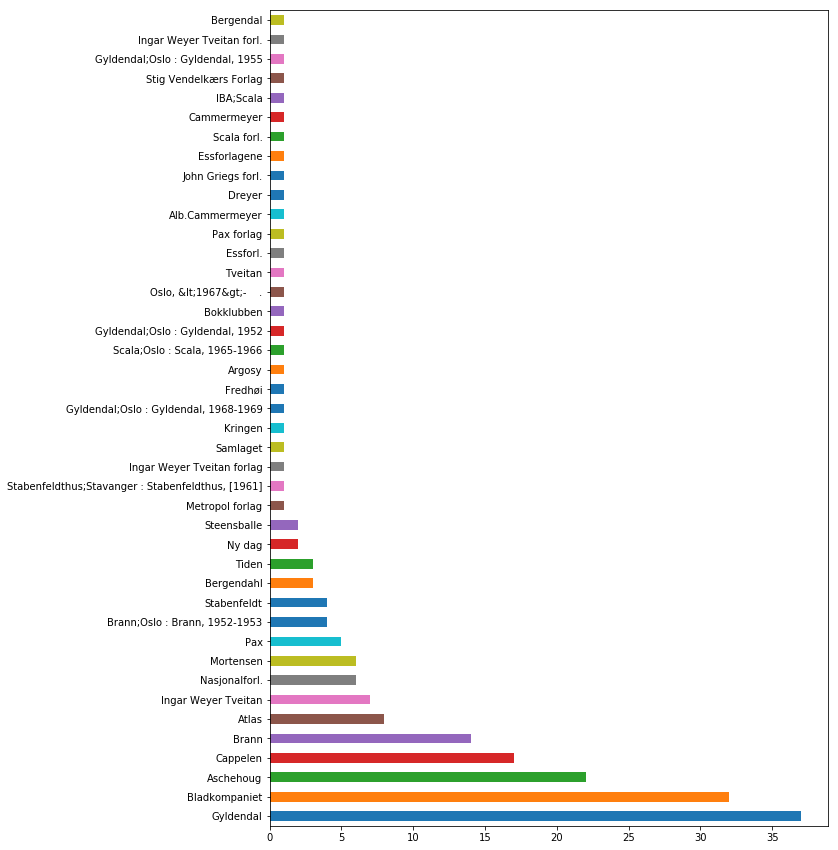

In [9]:
m_data['forlag'].value_counts().plot(kind='barh', figsize=(10,15))

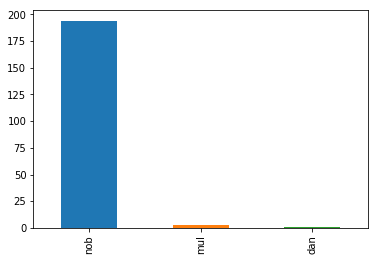

In [10]:
m_data['språk'].value_counts().plot(kind='bar')

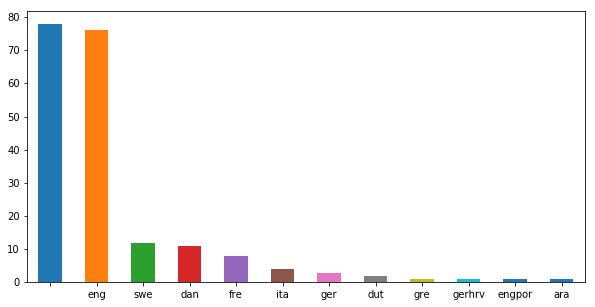

In [11]:
m_data['originalspråk'].value_counts().plot(kind='bar', rot=0.5, figsize=(10,5))

In [12]:
book_counts = [nb.book_count(m) for m in meta]

In [13]:
sum([list(x.values())[0] for x in book_counts])

16609111